In [1]:
#Project Time Series with Prophet

In [2]:
#Install Prophet from Julie's terminal:
#conda install gcc
#conda install -c conda-forge fbprophet

In [3]:
!pip install fbprophet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [4]:
# Install yfinance

In [5]:
!pip install yfinance
import yfinance as yf  

In [6]:
#Downloading NFLX between january 2017 et september 2020

In [7]:
dataset = yf.download('NFLX','2017-01-01','2020-09-01')

[*********************100%***********************]  1 of 1 completed


In [8]:
dataset.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900
2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600
2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500
2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900
2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5771800
2017-01-10,131.270004,132.220001,129.289993,129.889999,129.889999,5985800
2017-01-11,130.910004,131.500000,129.250000,130.500000,130.500000,5615100
2017-01-12,130.630005,130.850006,128.500000,129.179993,129.179993,5388900
2017-01-13,131.149994,133.929993,130.580002,133.699997,133.699997,10515000


In [9]:
dataset.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-18,484.350006,495.299988,482.799988,491.869995,491.869995,3505500
2020-08-19,493.929993,494.500000,483.500000,484.529999,484.529999,3156200
2020-08-20,484.690002,498.940002,483.890015,497.899994,497.899994,5132500
2020-08-21,496.459991,498.130005,490.000000,492.309998,492.309998,3921300
2020-08-24,495.440002,501.000000,483.160004,488.809998,488.809998,4762200
2020-08-25,488.190002,492.470001,485.089996,490.579987,490.579987,5727700
2020-08-26,492.500000,549.039978,492.079987,547.530029,547.530029,20373700
2020-08-27,537.780029,541.000000,521.250000,526.270020,526.270020,9062900
2020-08-28,532.000000,539.000000,522.000000,523.890015,523.890015,4417500


In [10]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,922.000000,922.000000,922.000000,922.000000,922.000000,9.220000e+02
mean,297.789621,302.468970,292.936724,297.961822,297.961822,8.486919e+06
std,97.666683,99.612286,95.735657,97.815558,97.815558,5.118943e+06
min,124.959999,128.190002,124.309998,127.489998,127.489998,2.019300e+06
25%,195.780003,197.542503,193.857498,195.720005,195.720005,5.186250e+06
50%,314.480011,319.720001,307.330002,315.389999,315.389999,6.973300e+06
75%,362.905006,368.119995,357.404999,362.727501,362.727501,1.010585e+07
max,567.979980,575.369995,522.000000,548.729980,548.729980,5.841040e+07


In [11]:
# Our goal is to predict future Netflix Inc. stock prices from the pre-covid data, then we'll add the first month
# then the first two months after the covid crisis was declared a pandemic to our training data.

In [12]:
# Création of a working dataframe

In [13]:
dataset1 = pd.DataFrame({ "ds":dataset.index, "y": dataset["Open"]}).reset_index(drop=True) #reset de l'index à faire
dataset1.head()

,ds,y
0,2017-01-03,124.959999
1,2017-01-04,127.489998
2,2017-01-05,129.220001
3,2017-01-06,132.080002
4,2017-01-09,131.479996


In [14]:
# Data visualization

<AxesSubplot:xlabel='ds', ylabel='y'>

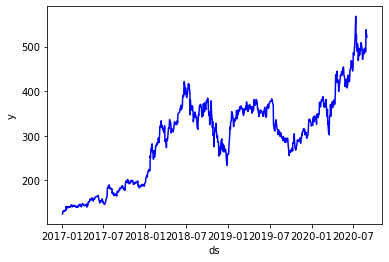

In [15]:
sns.lineplot(x=dataset1.ds,y=dataset1.y,color='blue')

In [16]:
# y is the target variable which corresponds to the stock price

In [17]:
# We want to predict future stock market prices with the pre-covid data (training set) and the added months will be the test set

In [18]:
# Pandemic declaration date March 11, 2020 source:https://www.who.int/fr/news/item/27-04-2020-who-timeline---covid-19

In [19]:
X_train= dataset1.loc[dataset1.ds <'2020-03-11',:]
X_test=dataset1.loc[dataset1.ds >='2020-03-11',:]

In [20]:
# Instantiating the model

In [21]:
model = Prophet()
train=model.fit(X_train)
prev=model.predict(X_test)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
prev

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-11,355.307575,359.074970,404.890505,355.307575,355.307575,25.877387,25.877387,25.877387,1.533832,1.533832,1.533832,24.343555,24.343555,24.343555,0.0,0.0,0.0,381.184962
1,2020-03-12,355.492838,358.211943,402.781276,355.492838,355.492838,26.328045,26.328045,26.328045,1.750993,1.750993,1.750993,24.577053,24.577053,24.577053,0.0,0.0,0.0,381.820884
2,2020-03-13,355.678101,360.979901,404.921837,355.678101,355.678101,26.631824,26.631824,26.631824,1.876000,1.876000,1.876000,24.755824,24.755824,24.755824,0.0,0.0,0.0,382.309926
3,2020-03-16,356.233890,359.187434,404.018240,356.233890,356.233890,25.170208,25.170208,25.170208,0.240062,0.240062,0.240062,24.930146,24.930146,24.930146,0.0,0.0,0.0,381.404098
4,2020-03-17,356.419153,359.781548,404.306618,356.419153,356.419153,26.620913,26.620913,26.620913,1.759553,1.759553,1.759553,24.861360,24.861360,24.861360,0.0,0.0,0.0,383.040066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2020-08-25,386.246486,342.515567,407.312441,365.253415,407.791997,-10.557959,-10.557959,-10.557959,1.759553,1.759553,1.759553,-12.317513,-12.317513,-12.317513,0.0,0.0,0.0,375.688527
117,2020-08-26,386.431749,342.912897,404.016184,365.267051,408.155276,-10.877381,-10.877381,-10.877381,1.533832,1.533832,1.533832,-12.411212,-12.411212,-12.411212,0.0,0.0,0.0,375.554369
118,2020-08-27,386.617012,344.150055,409.654171,365.201725,408.518556,-10.720759,-10.720759,-10.720759,1.750993,1.750993,1.750993,-12.471752,-12.471752,-12.471752,0.0,0.0,0.0,375.896253
119,2020-08-28,386.802275,344.609021,408.594964,365.136398,408.827804,-10.625740,-10.625740,-10.625740,1.876000,1.876000,1.876000,-12.501740,-12.501740,-12.501740,0.0,0.0,0.0,376.176536


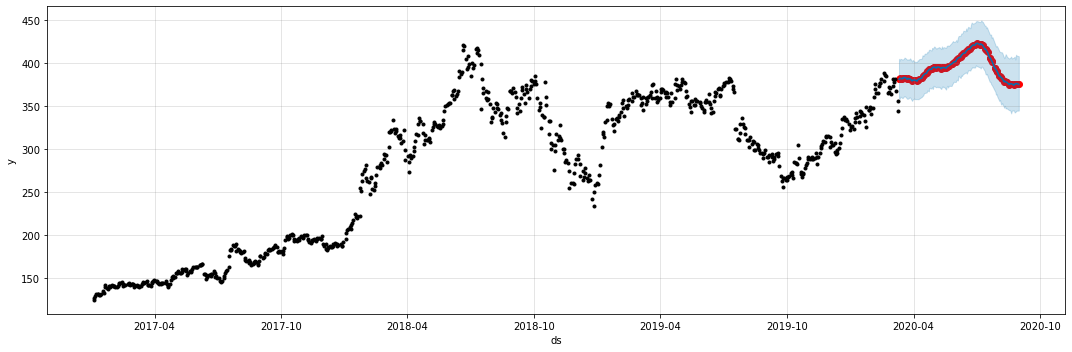

In [23]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(prev.ds, prev.yhat, color='r')
fig = model.plot(prev, ax=ax)

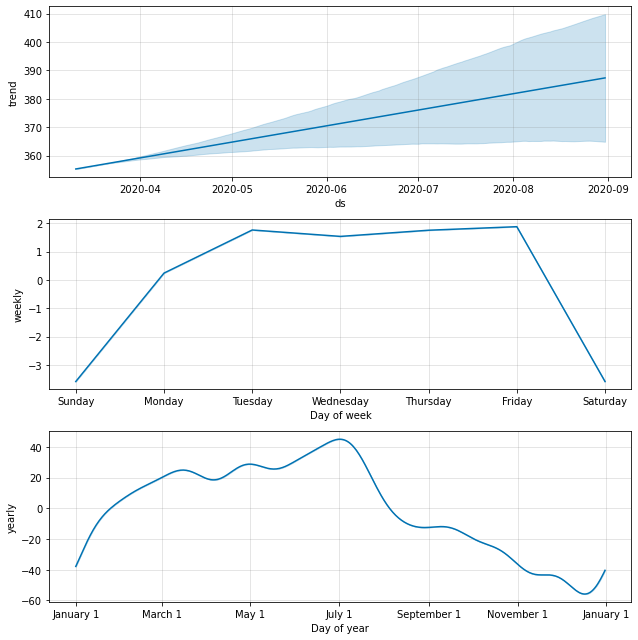

In [24]:
fig = model.plot_components(prev)

In [25]:
# MAPE calculation

In [26]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true=X_test['y'],
                   y_pred=prev.yhat)

print("The MAPE on the test set is : \n {}".format(mape))

The MAPE on the test set is : 
 12.306170121138216


In [27]:
# We study seasonality as seen in the course

In [28]:
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(dataset1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
model.train_holiday_names

0                  New Year's Day
1       New Year's Day (Observed)
2      Martin Luther King Jr. Day
3           Washington's Birthday
4                    Memorial Day
5                Independence Day
6                       Labor Day
7                    Columbus Day
8                    Veterans Day
9         Veterans Day (Observed)
10                   Thanksgiving
11                  Christmas Day
12    Independence Day (Observed)
dtype: object

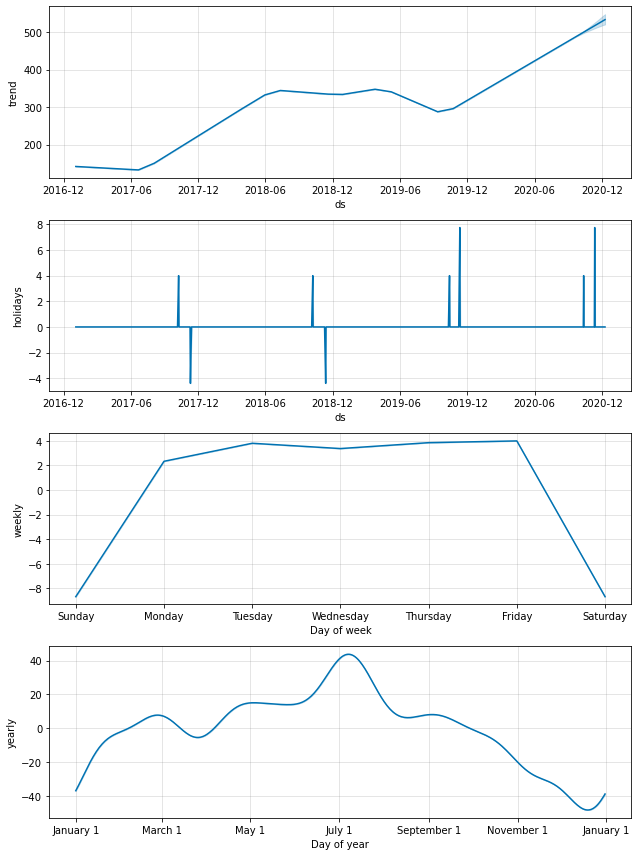

In [30]:
future = model.make_future_dataframe(periods=100)
prevision = model.predict(future)
fig = model.plot_components(prevision)

In [31]:
prevision

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-03,141.812803,89.799660,133.832151,141.812803,141.812803,0.0,0.0,0.0,0.0,...,3.803845,3.803845,3.803845,-33.705800,-33.705800,-33.705800,0.0,0.0,0.0,111.910848
1,2017-01-04,141.758694,90.287438,136.239925,141.758694,141.758694,0.0,0.0,0.0,0.0,...,3.373725,3.373725,3.373725,-31.981543,-31.981543,-31.981543,0.0,0.0,0.0,113.150876
2,2017-01-05,141.704585,90.286085,139.395906,141.704585,141.704585,0.0,0.0,0.0,0.0,...,3.852891,3.852891,3.852891,-30.230609,-30.230609,-30.230609,0.0,0.0,0.0,115.326868
3,2017-01-06,141.650476,93.946655,141.480454,141.650476,141.650476,0.0,0.0,0.0,0.0,...,3.995968,3.995968,3.995968,-28.466968,-28.466968,-28.466968,0.0,0.0,0.0,117.179477
4,2017-01-09,141.488150,98.350164,143.584622,141.488150,141.488150,0.0,0.0,0.0,0.0,...,2.336724,2.336724,2.336724,-23.234196,-23.234196,-23.234196,0.0,0.0,0.0,120.590677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,2020-12-05,530.723804,453.836502,508.832574,519.100645,544.490015,0.0,0.0,0.0,0.0,...,-8.681577,-8.681577,-8.681577,-39.916749,-39.916749,-39.916749,0.0,0.0,0.0,482.125478
1018,2020-12-06,531.299250,455.575010,510.353744,519.335883,545.235569,0.0,0.0,0.0,0.0,...,-8.681577,-8.681577,-8.681577,-40.792298,-40.792298,-40.792298,0.0,0.0,0.0,481.825375
1019,2020-12-07,531.874697,464.705611,521.205526,519.591423,545.981122,0.0,0.0,0.0,0.0,...,2.336724,2.336724,2.336724,-41.672698,-41.672698,-41.672698,0.0,0.0,0.0,492.538723
1020,2020-12-08,532.450143,464.729039,521.759588,519.846963,546.726675,0.0,0.0,0.0,0.0,...,3.803845,3.803845,3.803845,-42.547505,-42.547505,-42.547505,0.0,0.0,0.0,493.706483


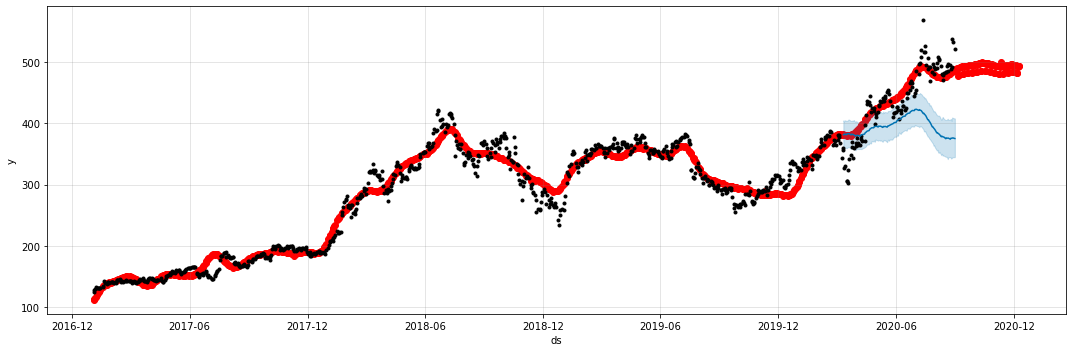

In [32]:
# Chart with seasonality
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(prevision.ds, prevision.yhat, color='r')
fig = model.plot(prev, ax=ax)